## **CLASSIFICATION OF THE DermaMNIST DATASET USING ARTIFICIAL INTELLIGENCE**

In [4]:
# The DermaMNIST dataset is downloaded from the url.
# The dataset is split into training, validation and test set with 7:1:2 ratio

derma_mnist_infos = {
    "url": "https://zenodo.org/record/6496656/files/dermamnist.npz?download=1",
    "label": {
        "0": "actinic keratoses and intraepithelial carcinoma",
        "1": "basal cell carcinoma",
        "2": "benign keratosis-like lesions",
        "3": "dermatofibroma",
        "4": "melanoma",
        "5": "melanocytic nevi",
        "6": "vascular lesions"
    },
    "n_channels": 3,
    "n_samples": {
        "train": 7007,
        "val": 1003,
        "test": 2005
    }
}

In [5]:
import numpy as np
from tensorflow import keras

# Load data from URL 'origin' to local 'data_path'
data_path = keras.utils.get_file(
    fname="/content/dermamnist.npz",
    origin=derma_mnist_infos["url"]
)
# The data is loaded as numpy arrays
data = np.load(data_path)

print(data.files)


19725078/19725078 [==============================] - 47s 2us/step
['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


## **PREPROCESSING THE DATASET**

In [6]:
X_test = data["test_images"]
X_train = data["train_images"]
y_test = data["test_labels"]
y_train = data["train_labels"]

In [7]:
X_train.shape

(7007, 28, 28, 3)

In [8]:
y_train.shape

(7007, 1)

In [9]:
X_test.shape

(2005, 28, 28, 3)

In [10]:
y_test.shape

(2005, 1)

In [11]:
for i in range(7):
  print(f"label {i}: {len(np.where(y_train == i)[0])}")

label 0: 228
label 1: 359
label 2: 769
label 3: 80
label 4: 779
label 5: 4693
label 6: 99


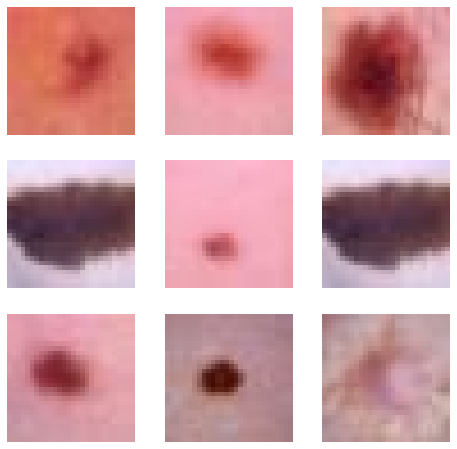

In [26]:

import matplotlib.pyplot as plt

# Visualising the images
label = 1


label_indices = np.where(X_test == label)[1]

# 9 images are chosen at random
random_indices = np.random.choice(label_indices, size=9)

# create a figure with 3x3 subplots
fig, ax = plt.subplots(3,3, figsize=(8,8))

# Iterate over the indices and axes
for index, axi in zip(random_indices, ax.flatten()):
  sample = X_train[index]
  axi.imshow(sample, cmap='gray_r')
  axi.set_axis_off()
plt.show()

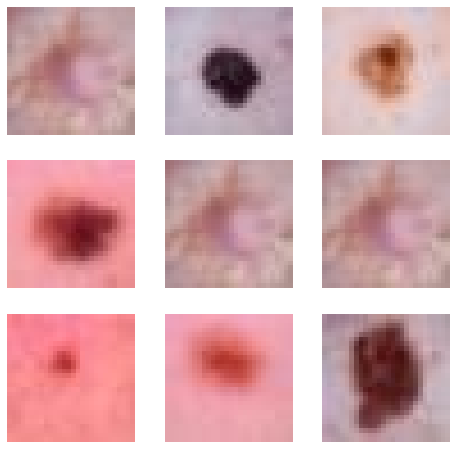

In [27]:

label = 1

# identify indices of samples of this digit
label_indices = np.where(X_train == label)[1]

# 9 images are chosen at random
random_indices = np.random.choice(label_indices, size=9)

# create a figure with 3x3 subplots
fig, ax = plt.subplots(3, 3, figsize=(8, 8))

# Iterate over the indices and axes
for index, axi in zip(random_indices, ax.flatten()):
  sample = X_train[index]
  axi.imshow(sample, cmap='gray_r')
  axi.set_axis_off()
plt.show()

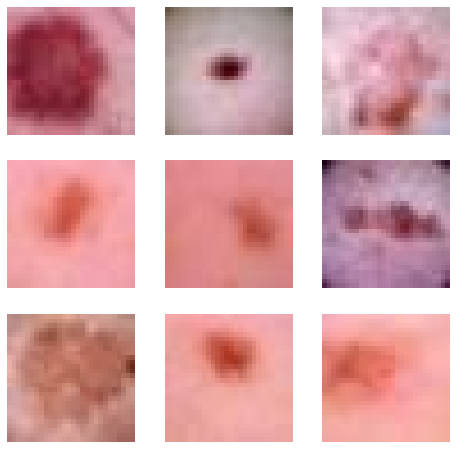

In [28]:

label = 0

# identify indices of samples of this digit
label_indices = np.where(y_test == label)[0]

# 9 images are chosen at random
random_indices = np.random.choice(label_indices, size=9)

# create a figure with 3 x 3 subplots
fig, ax = plt.subplots(3, 3, figsize=(8, 8))

# Iterate over the indices and axes
for index, axi in zip(random_indices, ax.flatten()):
  sample = X_train[index]
  axi.imshow(sample, cmap='gray_r')
  axi.set_axis_off()
plt.show()

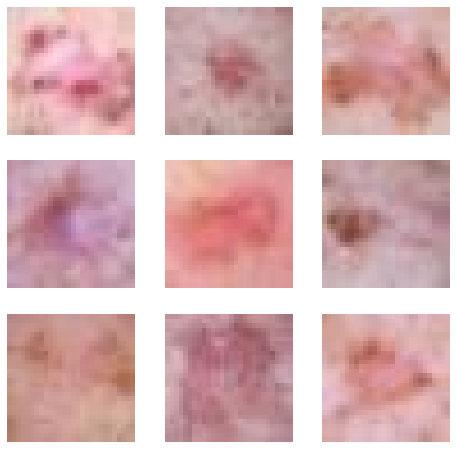

In [29]:

label = 0

# identify indices of samples of this digit
label_indices = np.where(y_train == label)[0]

# 9 images are chosen at random
random_indices = np.random.choice(label_indices, size=15)

# create a figure with 3x3 subplots
fig, ax = plt.subplots(3, 3, figsize=(8, 8))

# Iterate over the indices and axes
for index, axi in zip(random_indices, ax.flatten()):
  sample = X_train[index]
  axi.imshow(sample, cmap='gray_r')
  axi.set_axis_off()
plt.show()

In [16]:
# Normalize by Min-Max-Scaling
X_train = X_train / 255.
X_test = X_test / 255.

# One-hot encoding
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=10)

## **BUILDING THE DermaMNIST MODEL**

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input


In [18]:

# The CNN model is built using 2 layers

model = Sequential([
    Input(shape=(28, 28,3)),

    # First Block
    Conv2D(filters=8, kernel_size=3, padding="same", activation="relu"),
    Conv2D(filters=8, kernel_size=3, padding="same", activation="relu"),
    MaxPooling2D(pool_size=2),

    # Second block
    Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    MaxPooling2D(pool_size=2),

    # Classification
    Flatten(),
    Dropout(rate= 0.3),   # A dropout rate of 3% was added to improve accuracy.
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
], name= "DermaMNIST_with_padding")

model.summary()

Model: "DermaMNIST_with_padding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                       

## **Training** **the** **Model**

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [20]:
# Model Compilation
model.compile(optimizer= Adam(learning_rate= 0.0001),
              loss= CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "DermaMNIST_with_padding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                       

In [21]:
%%time
history = model.fit(
    X_train, y_train_one_hot, 
    batch_size=8,
    epochs= 10, 
    validation_data=(X_test, y_test_one_hot)
)

    # Different training hyperparameters were used in order to improve the accuracy and validation accuracy. 
    # More layers were attempted, the dropout rate was increased and the batch size and epochs were varied.
    # So far, this is the most suitable result after several trials.
         

Epoch 1/10
876/876 [==============================] - 18s 7ms/step - loss: 1.1305 - accuracy: 0.6618 - val_loss: 0.9963 - val_accuracy: 0.6688
Epoch 2/10
876/876 [==============================] - 6s 6ms/step - loss: 0.9789 - accuracy: 0.6713 - val_loss: 0.9355 - val_accuracy: 0.6878
Epoch 3/10
876/876 [==============================] - 5s 6ms/step - loss: 0.9309 - accuracy: 0.6790 - val_loss: 0.9069 - val_accuracy: 0.6903
Epoch 4/10
876/876 [==============================] - 6s 7ms/step - loss: 0.9085 - accuracy: 0.6856 - val_loss: 0.8836 - val_accuracy: 0.6813
Epoch 5/10
876/876 [==============================] - 5s 6ms/step - loss: 0.8871 - accuracy: 0.6822 - val_loss: 0.8781 - val_accuracy: 0.6803
Epoch 6/10
876/876 [==============================] - 6s 7ms/step - loss: 0.8825 - accuracy: 0.6867 - val_loss: 0.8568 - val_accuracy: 0.6878
Epoch 7/10
876/876 [==============================] - 7s 8ms/step - loss: 0.8708 - accuracy: 0.6875 - val_loss: 0.8476 - val_accuracy: 0.6908
Epoch

## **Plotting the Learning Curves**

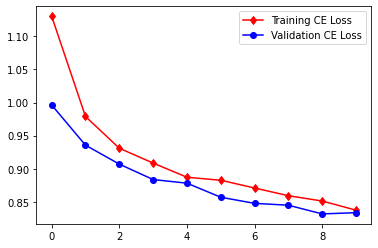

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot epochs against losses

model_history = pd.DataFrame(history.history)
model_history["epoch"] = history.epoch


plt.plot(model_history["epoch"], model_history["loss"], marker='d', color= 'red', label="Training CE Loss")
plt.plot(model_history["epoch"], model_history["val_loss"], marker='o', color= 'blue', label="Validation CE Loss")
plt.legend()
plt.show()






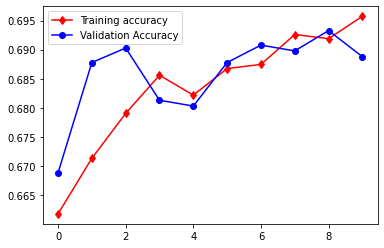

In [23]:
# Plot the epochs against accuracy

plt.plot(model_history["epoch"], model_history["accuracy"], marker='d', color= 'red', label="Training accuracy")
plt.plot(model_history["epoch"], model_history["val_accuracy"], marker='o', color= 'blue', label="Validation Accuracy")
plt.legend()

plt.show()


# **Confusion Matrix**

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix

# calculating the confusion matrix

cm = confusion_matrix(y_test, np.argmax(model.predict(X_test, verbose= 0), axis= 1))

## **Visuallizing the matrix**

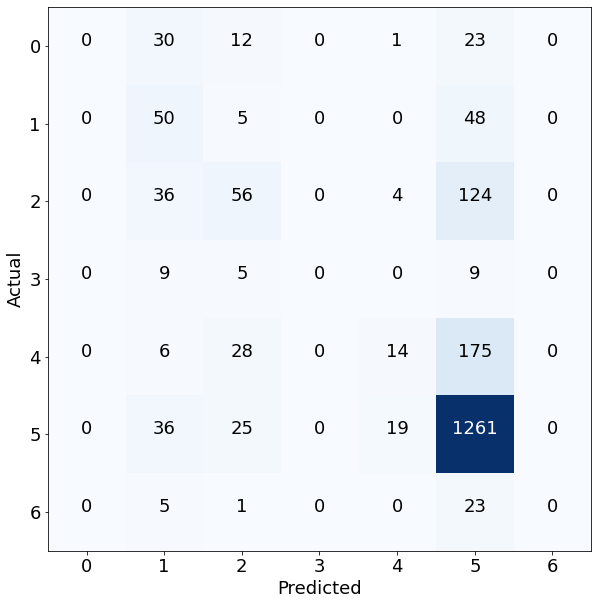

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import itertools
import os

# Increasing the font size
matplotlib.rcParams.update({'font.size': 18})

classes = [str(i) for i in range(7)]  # [0, 1, 2, 3, 4, 5, 6]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.imshow(cm, cmap=plt.cm.Blues)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()
